In [ ]:
import pandas as pd
import numpy as np
import json
import os

import matplotlib.pyplot as plt
import seaborn as sns

import evaluate_queries as evaluate_queries

from pathlib import Path

from sklearn.metrics import ndcg_score
from tqdm import tqdm

sns.set(rc={'figure.figsize':(19, 11)}, font_scale=2)

# Set the working dataframe

In [48]:
df_path = '../../data/tables/wikipages/wikipages_df.pickle'
wikipage_queries_path = '../../data/queries/wikipages/queries/'

df = pd.read_pickle(df_path)

# Loop over the the queries for each wikipedia page and identify their tuple width and number of tuples to update df
df['tuple_width'] = np.nan
df['num_tuples'] = np.nan

for idx, row in tqdm(df.iterrows(), total=len(df.index)):
    # Read query file
    with open(wikipage_queries_path+'wikipage_'+str(row['wikipage_id'])+'.json', 'r') as fp:
        query = json.load(fp)['queries']
    
    tuple_width = len(query[0])
    num_tuples = len(query)
    df.loc[idx, 'tuple_width'] = tuple_width
    df.loc[idx, 'num_tuples'] = num_tuples

df.to_pickle('wikipages_df.pickle')
df

100%|██████████| 1418/1418 [00:02<00:00, 662.44it/s]


,wikipage,wikipage_id,num_tables,tables,num_entities,tuple_width,num_tuples
124,"https://en.wikipedia.org/wiki/List_of_Murder,_...",124,20,"[table-0001-805.json, table-0001-806.json, tab...","[50, 19, 52, 66, 124, 29, 12, 68, 59, 101, 130...",1.0,130.0
344,https://en.wikipedia.org/wiki/List_of_vaudevil...,344,10,"[table-0002-885.json, table-0002-886.json, tab...","[53, 32, 105, 66, 50, 18, 41, 44, 61, 11]",2.0,29.0
849,https://en.wikipedia.org/wiki/1994_NHL_Entry_D...,849,12,"[table-0005-960.json, table-0005-961.json, tab...","[74, 18, 20, 12, 36, 34, 26, 20, 18, 16, 10, 21]",5.0,2.0
1955,https://en.wikipedia.org/wiki/List_of_automobi...,1955,13,"[table-0012-625.json, table-0012-628.json, tab...","[27, 31, 41, 30, 15, 19, 11, 18, 20, 26, 15, 5...",2.0,10.0
1996,https://en.wikipedia.org/wiki/List_of_Unicode_...,1996,14,"[table-0012-802.json, table-0012-809.json, tab...","[70, 214, 24, 19, 25, 83, 14, 13, 63, 67, 123,...",16.0,16.0
...,...,...,...,...,...,...,...
243867,https://en.wikipedia.org/wiki/List_of_people_o...,243867,20,"[table-1651-752.json, table-1651-753.json, tab...","[17, 154, 51, 10, 33, 37, 11, 99, 32, 26, 118,...",3.0,7.0
243879,https://en.wikipedia.org/wiki/List_of_blue_pla...,243879,13,"[table-1651-832.json, table-1651-835.json, tab...","[29, 28, 39, 39, 23, 34, 101, 23, 42, 168, 35,...",4.0,5.0
243999,https://en.wikipedia.org/wiki/List_of_James_Bo...,243999,10,"[table-1652-462.json, table-1652-464.json, tab...","[22, 23, 16, 21, 23, 16, 84, 20, 33, 38]",4.0,2.0
244040,https://en.wikipedia.org/wiki/List_of_World_Aq...,244040,16,"[table-1652-649.json, table-1652-651.json, tab...","[31, 37, 41, 37, 36, 38, 41, 28, 29, 40, 27, 4...",4.0,15.0


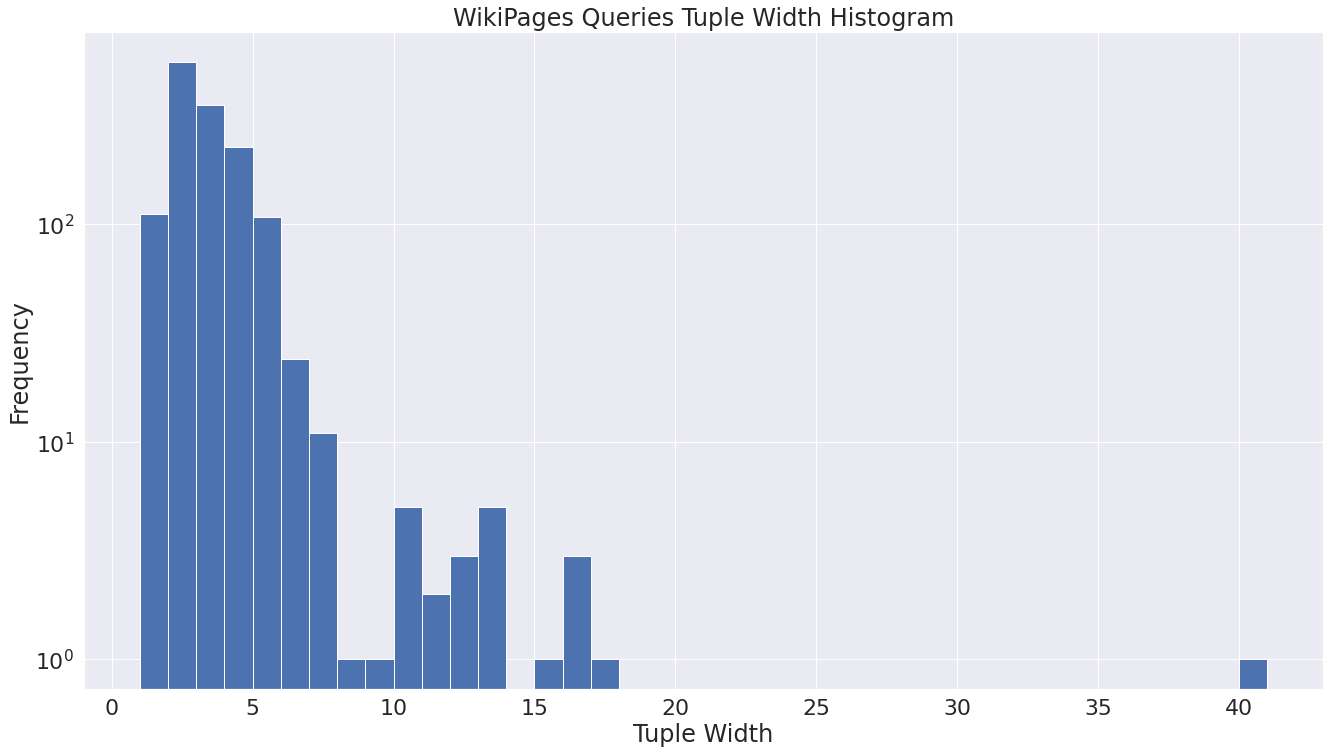

In [49]:
ax = plt.hist(df['tuple_width'], bins=40)
plt.yscale('log');plt.xlabel("Tuple Width")
plt.ylabel('Frequency');plt.title('WikiPages Queries Tuple Width Histogram');plt.tight_layout()
plt.savefig('figures/tuple_width_histogram.svg')

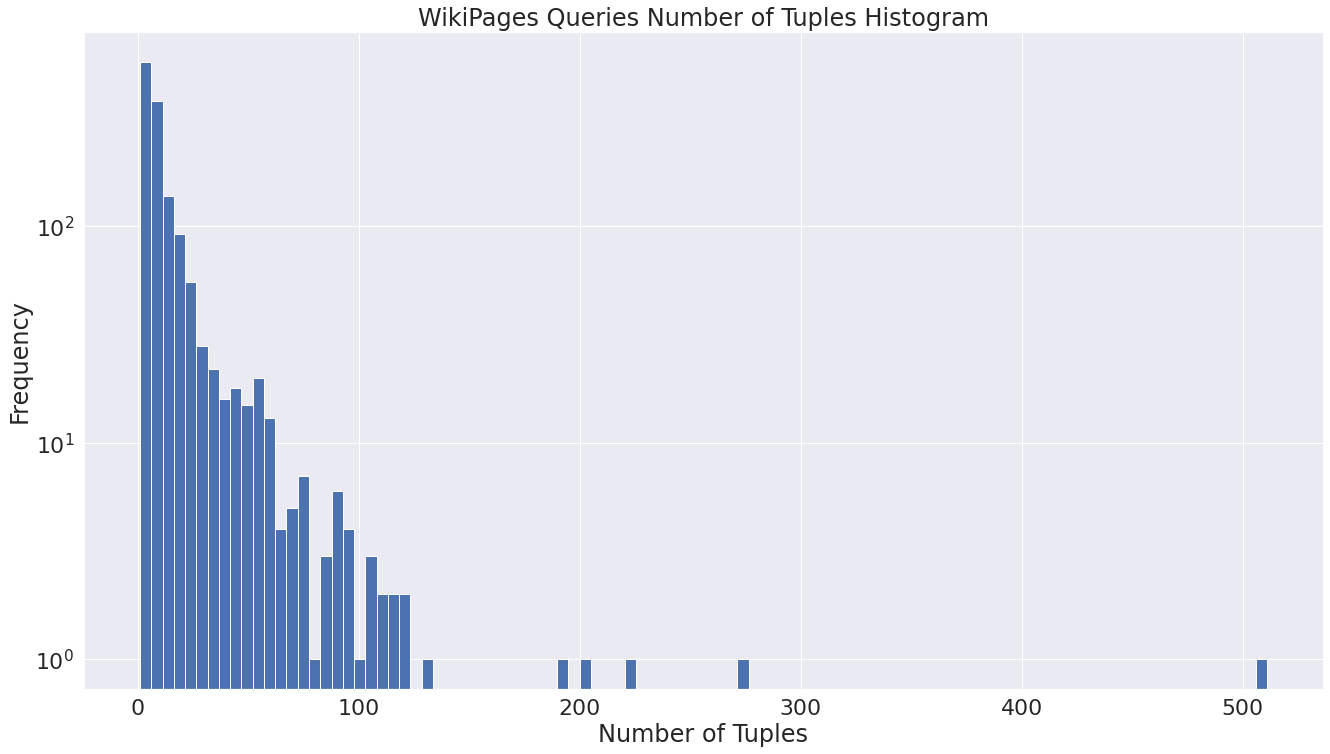

In [50]:
ax = plt.hist(df['num_tuples'], bins=100)
plt.yscale('log');plt.xlabel("Number of Tuples")
plt.ylabel('Frequency');plt.title('WikiPages Queries Number of Tuples Histogram');plt.tight_layout()
plt.savefig('figures/num_tuples_histogram.svg')

# Evaluation over Search Output (Traditional Top-k Evaluation)

In [52]:
df = pd.read_pickle('wikipages_df.pickle')

scores_path = 'eval_over_search_output/'

for file in os.listdir(scores_path):
    with open(scores_path + file, 'r') as f:
        scores_dict = json.load(f)

    wikipage_id_to_score = {}
    for wikipage_id in scores_dict:
        wikipage_id_to_score[int(wikipage_id)] = scores_dict[wikipage_id]['ndcg']
    
    k = file.split('_')[-1].split('.')[0]
    df['ndcg@'+k] = np.nan
    df['ndcg@'+k] = df['wikipage_id'].map(wikipage_id_to_score)

df

,wikipage,wikipage_id,num_tables,tables,num_entities,tuple_width,num_tuples,ndcg@50,ndcg@100,ndcg@10,ndcg@400,ndcg@200,ndcg@150,ndcg@20
124,"https://en.wikipedia.org/wiki/List_of_Murder,_...",124,20,"[table-0001-805.json, table-0001-806.json, tab...","[50, 19, 52, 66, 124, 29, 12, 68, 59, 101, 130...",1.0,130.0,0.203847,0.179118,0.000000,0.273250,0.178304,0.166112,0.000000
344,https://en.wikipedia.org/wiki/List_of_vaudevil...,344,10,"[table-0002-885.json, table-0002-886.json, tab...","[53, 32, 105, 66, 50, 18, 41, 44, 61, 11]",2.0,29.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
849,https://en.wikipedia.org/wiki/1994_NHL_Entry_D...,849,12,"[table-0005-960.json, table-0005-961.json, tab...","[74, 18, 20, 12, 36, 34, 26, 20, 18, 16, 10, 21]",5.0,2.0,1.000000,1.000000,1.000000,0.602004,0.602004,0.602004,1.000000
1955,https://en.wikipedia.org/wiki/List_of_automobi...,1955,13,"[table-0012-625.json, table-0012-628.json, tab...","[27, 31, 41, 30, 15, 19, 11, 18, 20, 26, 15, 5...",2.0,10.0,0.940019,0.940019,0.981544,0.940019,0.940019,0.940019,0.948865
1996,https://en.wikipedia.org/wiki/List_of_Unicode_...,1996,14,"[table-0012-802.json, table-0012-809.json, tab...","[70, 214, 24, 19, 25, 83, 14, 13, 63, 67, 123,...",16.0,16.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243867,https://en.wikipedia.org/wiki/List_of_people_o...,243867,20,"[table-1651-752.json, table-1651-753.json, tab...","[17, 154, 51, 10, 33, 37, 11, 99, 32, 26, 118,...",3.0,7.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
243879,https://en.wikipedia.org/wiki/List_of_blue_pla...,243879,13,"[table-1651-832.json, table-1651-835.json, tab...","[29, 28, 39, 39, 23, 34, 101, 23, 42, 168, 35,...",4.0,5.0,0.000000,0.000000,0.000000,0.214351,0.137261,0.000000,0.000000
243999,https://en.wikipedia.org/wiki/List_of_James_Bo...,243999,10,"[table-1652-462.json, table-1652-464.json, tab...","[22, 23, 16, 21, 23, 16, 84, 20, 33, 38]",4.0,2.0,0.413211,0.418493,0.430677,0.407954,0.413047,0.418493,0.408408
244040,https://en.wikipedia.org/wiki/List_of_World_Aq...,244040,16,"[table-1652-649.json, table-1652-651.json, tab...","[31, 37, 41, 37, 36, 38, 41, 28, 29, 40, 27, 4...",4.0,15.0,0.397028,0.397028,0.557174,0.397028,0.397028,0.397028,0.431672


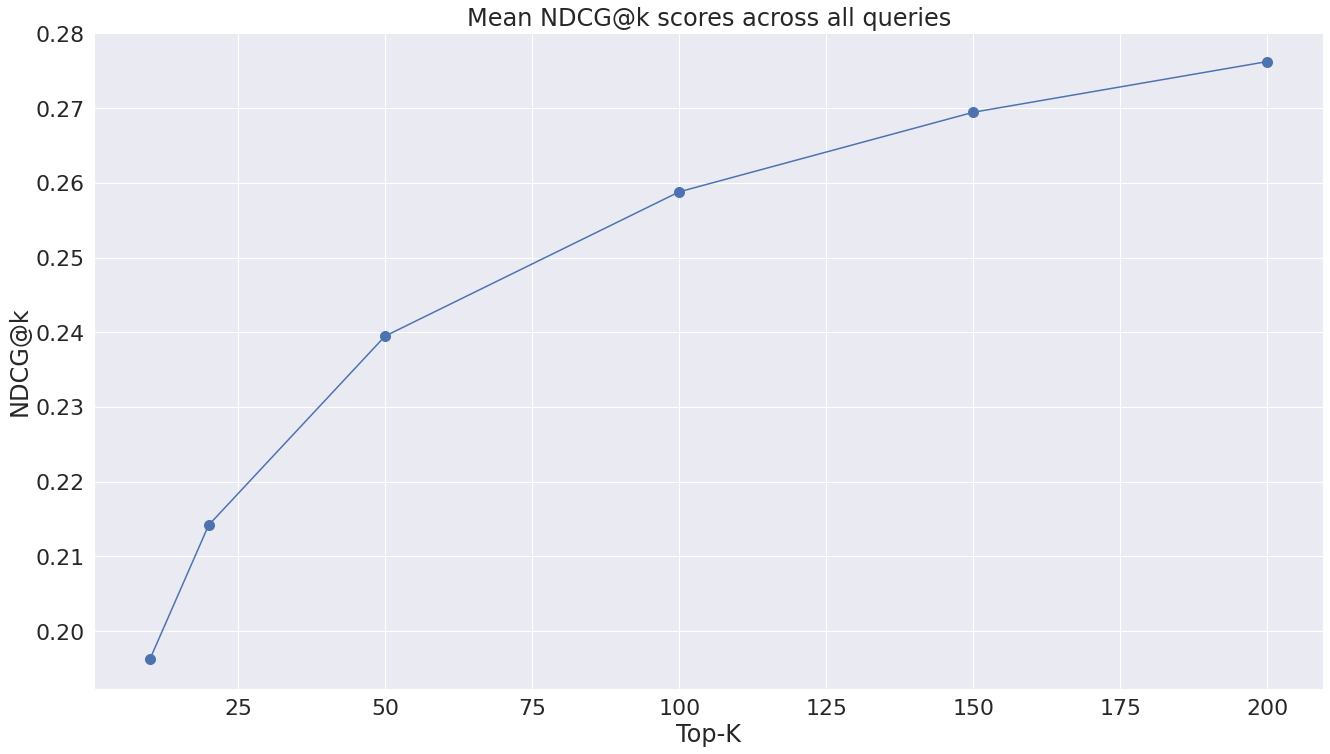

In [53]:
top_k_vals = [10, 20, 50, 100, 150, 200]
mean_ndcg_scores_at_k = [df['ndcg@'+str(k)].mean() for k in top_k_vals]
std_ndcg_scores_at_k = [df['ndcg@'+str(k)].std() for k in top_k_vals]

plt.plot(top_k_vals, mean_ndcg_scores_at_k, marker='o', markersize=10)
plt.xlabel("Top-K");plt.ylabel('NDCG@k');plt.title('Mean NDCG@k scores across all queries');plt.tight_layout()
plt.savefig('figures/topk_ndcg@k.svg')

In [56]:
# Remove queries with tuple width less than 3 and remove queries with less than 10 tuples 
df_filtered = df[(df['tuple_width'] >=3) & (df['num_tuples']>=10)]
df_filtered

,wikipage,wikipage_id,num_tables,tables,num_entities,tuple_width,num_tuples,ndcg@50,ndcg@100,ndcg@10,ndcg@400,ndcg@200,ndcg@150,ndcg@20
1996,https://en.wikipedia.org/wiki/List_of_Unicode_...,1996,14,"[table-0012-802.json, table-0012-809.json, tab...","[70, 214, 24, 19, 25, 83, 14, 13, 63, 67, 123,...",16.0,16.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2057,https://en.wikipedia.org/wiki/List_of_alumni_o...,2057,12,"[table-0013-294.json, table-0013-295.json, tab...","[17, 45, 23, 27, 21, 27, 21, 51, 18, 21, 53, 34]",3.0,11.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2684,https://en.wikipedia.org/wiki/Association_foot...,2684,14,"[table-0017-230.json, table-0017-231.json, tab...","[160, 118, 81, 53, 108, 60, 49, 33, 55, 170, 7...",4.0,10.0,0.844276,0.781752,1.000000,0.760194,0.760194,0.760194,0.855847
2920,https://en.wikipedia.org/wiki/1997_MLS_Expansi...,2920,11,"[table-0018-986.json, table-0018-987.json, tab...","[43, 13, 19, 15, 17, 19, 18, 18, 18, 18, 18]",4.0,13.0,0.630930,0.630930,0.630930,0.630930,0.630930,0.630930,0.630930
3338,https://en.wikipedia.org/wiki/List_of_Texas_co...,3338,11,"[table-0021-783.json, table-0021-785.json, tab...","[37, 44, 54, 40, 30, 65, 60, 79, 27, 50, 32]",3.0,17.0,0.715182,0.715182,0.665704,0.715182,0.715182,0.715182,0.715827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238760,https://en.wikipedia.org/wiki/Inside_Soap_Awards,238760,12,"[table-1618-639.json, table-1618-640.json, tab...","[25, 21, 24, 21, 24, 21, 24, 23, 26, 22, 25, 22]",3.0,11.0,0.997196,0.997196,1.000000,0.997196,0.997196,0.997196,0.997196
239349,https://en.wikipedia.org/wiki/List_of_Internat...,239349,10,"[table-1622-662.json, table-1622-663.json, tab...","[21, 17, 17, 12, 10, 24, 16, 13, 20, 25]",5.0,39.0,0.670137,0.661538,0.753287,0.651261,0.651261,0.651261,0.729172
241311,https://en.wikipedia.org/wiki/List_of_Olympic_...,241311,16,"[table-1636-172.json, table-1636-173.json, tab...","[32, 46, 28, 35, 44, 96, 56, 68, 42, 41, 79, 6...",4.0,24.0,0.476470,0.517713,0.000000,0.517713,0.517713,0.517713,0.380975
244040,https://en.wikipedia.org/wiki/List_of_World_Aq...,244040,16,"[table-1652-649.json, table-1652-651.json, tab...","[31, 37, 41, 37, 36, 38, 41, 28, 29, 40, 27, 4...",4.0,15.0,0.397028,0.397028,0.557174,0.397028,0.397028,0.397028,0.431672


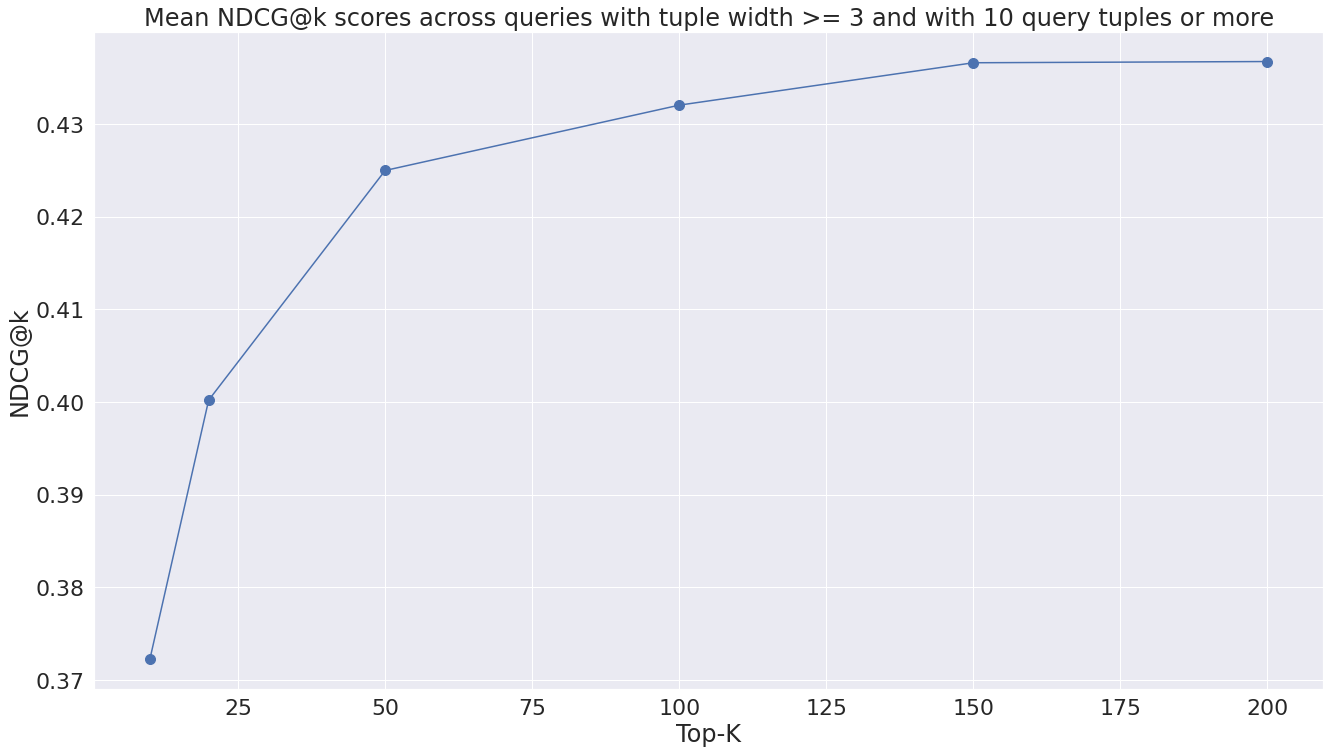

In [54]:
mean_ndcg_scores_at_k = [df_filtered['ndcg@'+str(k)].mean() for k in top_k_vals]

plt.plot(top_k_vals, mean_ndcg_scores_at_k, marker='o', markersize=10)
plt.xlabel("Top-K");plt.ylabel('NDCG@k');plt.title('Mean NDCG@k scores across queries with tuple width >= 3 and with 10 query tuples or more');plt.tight_layout()
plt.savefig('figures/topk_ndcg@k_filtered.svg')

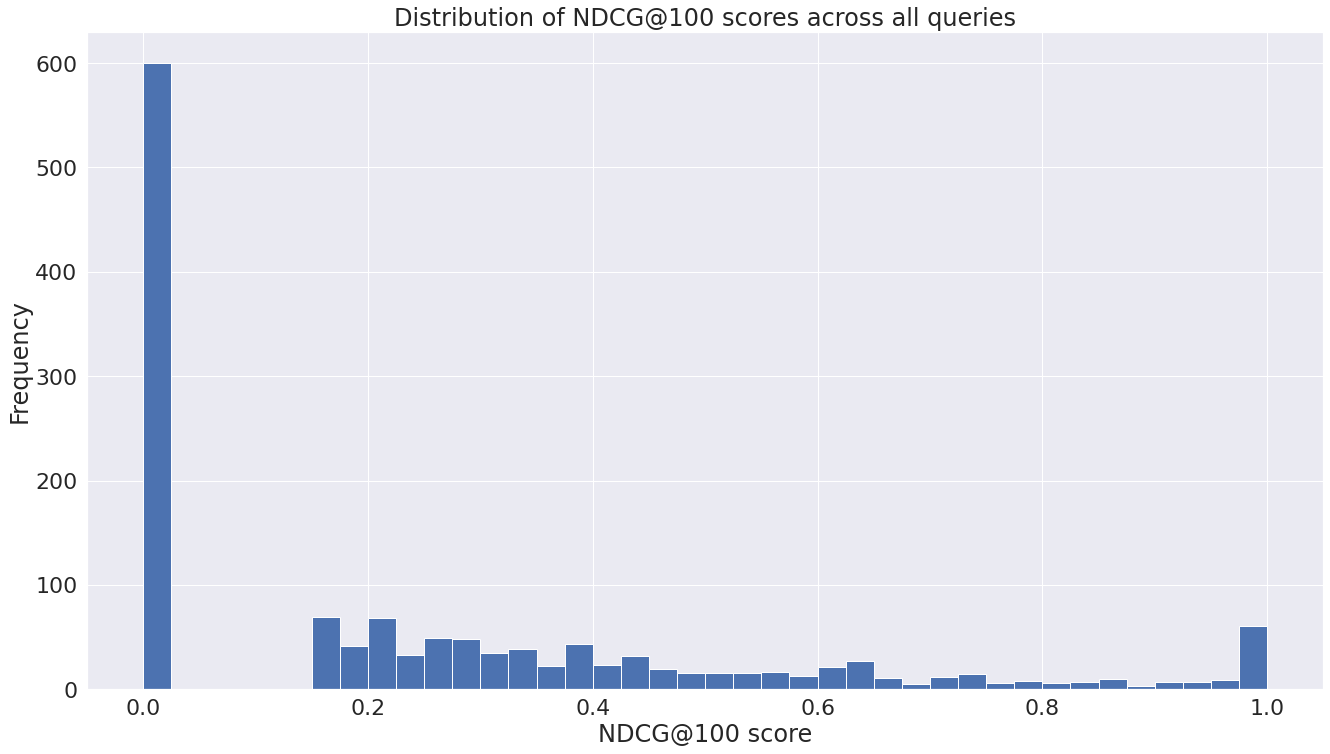

In [55]:
# Distribution of NDCG scores for top-100
ax = plt.hist(df['ndcg@100'], bins=40)
plt.xlabel("NDCG@100 score");plt.ylabel('Frequency');plt.title('Distribution of NDCG@100 scores across all queries');plt.tight_layout()
plt.savefig('figures/ndcg100_score_distribution.svg')

# Evaluation over labeled ground truth

In [62]:
df = pd.read_pickle('wikipages_df.pickle')

scores_path = 'eval_over_labeled_ground_truth/'

# Dictionary mapping each wikipage_id to the list of ndcg scores across all seeds
wikipage_id_to_list_of_ndcg_scores = {}

for file in os.listdir(scores_path):
    with open(scores_path + file, 'r') as f:
        scores_dict = json.load(f)

    for wikipage_id in scores_dict:
        if wikipage_id not in wikipage_id_to_list_of_ndcg_scores:
            wikipage_id_to_list_of_ndcg_scores[wikipage_id] = []
        wikipage_id_to_list_of_ndcg_scores[wikipage_id].append(scores_dict[wikipage_id])

mean_wikipage_id_ndcg_scores = {}
std_wikipage_id_ndcg_scores = {}

for wikipage_id in wikipage_id_to_list_of_ndcg_scores:
    mean_wikipage_id_ndcg_scores[int(wikipage_id)] = np.mean(wikipage_id_to_list_of_ndcg_scores[wikipage_id])
    std_wikipage_id_ndcg_scores[int(wikipage_id)] = np.std(wikipage_id_to_list_of_ndcg_scores[wikipage_id])

df['ndcg'] = np.nan
df['ndcg_std'] = np.nan
df['ndcg'] = df['wikipage_id'].map(mean_wikipage_id_ndcg_scores)
df['ndcg_std'] = df['wikipage_id'].map(std_wikipage_id_ndcg_scores)
df

,wikipage,wikipage_id,num_tables,tables,num_entities,tuple_width,num_tuples,ndcg,ndcg_std
124,"https://en.wikipedia.org/wiki/List_of_Murder,_...",124,20,"[table-0001-805.json, table-0001-806.json, tab...","[50, 19, 52, 66, 124, 29, 12, 68, 59, 101, 130...",1.0,130.0,0.977455,0.034175
344,https://en.wikipedia.org/wiki/List_of_vaudevil...,344,10,"[table-0002-885.json, table-0002-886.json, tab...","[53, 32, 105, 66, 50, 18, 41, 44, 61, 11]",2.0,29.0,0.835585,0.095236
849,https://en.wikipedia.org/wiki/1994_NHL_Entry_D...,849,12,"[table-0005-960.json, table-0005-961.json, tab...","[74, 18, 20, 12, 36, 34, 26, 20, 18, 16, 10, 21]",5.0,2.0,0.963389,0.014472
1955,https://en.wikipedia.org/wiki/List_of_automobi...,1955,13,"[table-0012-625.json, table-0012-628.json, tab...","[27, 31, 41, 30, 15, 19, 11, 18, 20, 26, 15, 5...",2.0,10.0,1.000000,0.000000
1996,https://en.wikipedia.org/wiki/List_of_Unicode_...,1996,14,"[table-0012-802.json, table-0012-809.json, tab...","[70, 214, 24, 19, 25, 83, 14, 13, 63, 67, 123,...",16.0,16.0,0.780199,0.000000
...,...,...,...,...,...,...,...,...,...
243867,https://en.wikipedia.org/wiki/List_of_people_o...,243867,20,"[table-1651-752.json, table-1651-753.json, tab...","[17, 154, 51, 10, 33, 37, 11, 99, 32, 26, 118,...",3.0,7.0,0.914333,0.069729
243879,https://en.wikipedia.org/wiki/List_of_blue_pla...,243879,13,"[table-1651-832.json, table-1651-835.json, tab...","[29, 28, 39, 39, 23, 34, 101, 23, 42, 168, 35,...",4.0,5.0,0.984828,0.020612
243999,https://en.wikipedia.org/wiki/List_of_James_Bo...,243999,10,"[table-1652-462.json, table-1652-464.json, tab...","[22, 23, 16, 21, 23, 16, 84, 20, 33, 38]",4.0,2.0,0.989759,0.006262
244040,https://en.wikipedia.org/wiki/List_of_World_Aq...,244040,16,"[table-1652-649.json, table-1652-651.json, tab...","[31, 37, 41, 37, 36, 38, 41, 28, 29, 40, 27, 4...",4.0,15.0,0.834929,0.011223


In [63]:
print('Mean NDCG score:', df['ndcg'].mean())
print('STD NDCG score:', df['ndcg_std'].std())

Mean NDCG score: 0.9381003602770923
STD NDCG score: 0.02741701090970798


In [64]:
# Remove queries with tuple width less than 3 and remove queries with less than 10 tuples 
df_filtered = df[(df['tuple_width'] >=3) & (df['num_tuples']>=10)]

print('Mean NDCG score:', df_filtered['ndcg'].mean())
print('STD NDCG score:', df_filtered['ndcg_std'].std())

Mean NDCG score: 0.9499676171318842
STD NDCG score: 0.024164783827687702
